# Emotion Classification of Tweets

### **Table of Contents**
* [<span style="color:#A690A4"> 0. Executive Summary](#exe_sum)
* [<span style="color:#A690A4"> 1. Introduction](#intro)
* [<span style="color:#A690A4"> 2. Collect, Wrangle & Explore](#process)
* [<span style="color:#A690A4"> 3. Predict Tweet Classification](#predict)
* [<span style="color:#A690A4"> 4. Conclusion](#conclusion)

# <span style="color:#5E6997">Executive Summary</span> <a class="anchor" id="exe_sum"></a>

# <span style="color:#5E6997">Introduction</span> <a class="anchor" id="intro"></a>

# <span style="color:#5E6997">Collect, Wrangle, and Explore</span> <a class="anchor" id="process"></a>

Import libraries for data manipulation, visualization, natural language processing, and machine learning.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

Load the dataset and display the first five rows.

In [2]:
df = pd.read_csv('./text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


#### Description of Data
<ul>
    <li><strong>text</strong> - A string feature representing the content of the Twitter message.</li>
    <li><strong>label</strong> - A classification label indicating the primary emotion, with values ranging from 0 to 5.</li>
    <ul>
        <li><strong>0</strong> - sadness</li>
        <li><strong>1</strong> - joy</li>
        <li><strong>2</strong> - love</li>
        <li><strong>3</strong> - anger</li>
        <li><strong>3</strong> - fear</li>
        <li><strong>3</strong> - surprise</li>
    </ul>
</ul>

Check for missing, Null or duplicate values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [4]:
df.duplicated().sum()

0

Good! No duplicates or Nulls.

I will get rid of duplicate index column since it is not needed.

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Rename existing features.

In [6]:
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)

Copy the dataset to be used in data analysis.

In [7]:
label_df = df.copy()

Change numerical encoding to text-based enconding. 
sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

In [8]:
label_df['Label'] = label_df['Label'].replace(0,'Sadness')
label_df['Label'] = label_df['Label'].replace(1,'Joy')
label_df['Label'] = label_df['Label'].replace(2,'Love')
label_df['Label'] = label_df['Label'].replace(3,'Anger')
label_df['Label'] = label_df['Label'].replace(4,'Fear')
label_df['Label'] = label_df['Label'].replace(5,'Surprise')

Here is the distribution of the emotion labels in the dataset. The plot shows the count of each emotion label.

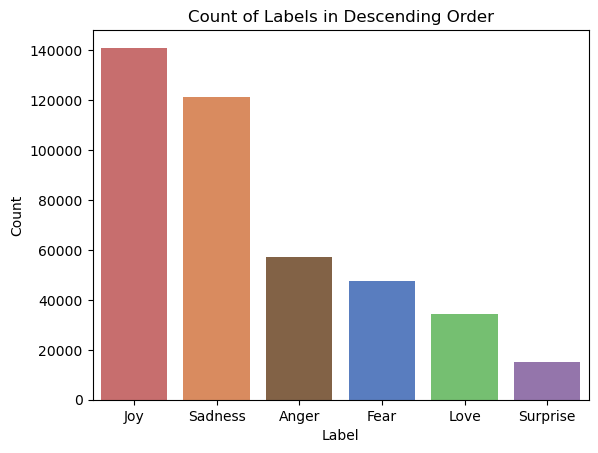

In [9]:
# Compute descending order of labels based on count
order = label_df['Label'].value_counts().index

# Create the countplot with a vibrant 'plasma' palette.
# Here we assign 'Label' to both x and hue to satisfy the future requirements.
sns.countplot(x='Label', hue='Label', data=label_df, order=order, palette='muted')

# Remove the redundant legend since the hue is identical to x.
plt.legend([],[], frameon=False)

# Add title and labels for clarity
plt.title("Count of Labels in Descending Order")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

Create seperate Dataframes for each emotional label. Each dataframe contains the text entries corresponding to its respective emotion.

In [10]:
df_sadness = label_df[label_df['Label']=='Sadness']
df_joy = label_df[label_df['Label']=='Joy']
df_love = label_df[label_df['Label']=='Love']
df_anger = label_df[label_df['Label']=='Anger']
df_fear = label_df[label_df['Label']=='Fear']
df_surprise = label_df[label_df['Label']=='Surprise']

Combine text from different emotions. The text from each category has been successfully combined into single strings.

In [11]:
combined_all_text = ' '.join(df['Text'])
combined_sadness_text = ' '.join(df_sadness['Text'])
combined_joy_text = ' '.join(df_joy['Text'])
combined_love_text = ' '.join(df_love['Text'])
combined_anger_text = ' '.join(df_anger['Text'])
combined_fear_text = ' '.join(df_fear['Text'])
combined_surprise_text = ' '.join(df_surprise['Text'])

I would like to see difference between all words, and top 100 words in each emotional category.

In [12]:
from collections import Counter
from IPython.display import display

# Set option to display all text in each cell
pd.set_option('display.max_colwidth', None)

# First, create a dictionary of top 100 words for each category (ignoring counts)
texts = {
    "All": combined_all_text,
    "Sadness": combined_sadness_text,
    "Joy": combined_joy_text,
    "Love": combined_love_text,
    "Anger": combined_anger_text,
    "Fear": combined_fear_text,
    "Surprise": combined_surprise_text
}

top_words_dict = {}
for category, text in texts.items():
    tokens = text.split()  # simple tokenization; adjust if necessary
    counter = Counter(tokens)
    top_words = [word for word, count in counter.most_common(100)]
    top_words_dict[category] = top_words

# Build a table showing the difference between the top 50 in "All" and in each other category.
data = []
all_set = set(top_words_dict["All"])
for category, words in top_words_dict.items():
    if category == "All":
        continue
    cat_set = set(words)
    # Calculate the words unique in the category (that do not appear in "All")
    unique_in_cat = sorted(cat_set - all_set)
    data.append({
        "Category": category,
        "Unique in Category (not in All)": ", ".join(unique_in_cat)
    })

df_diff = pd.DataFrame(data)

# Display the resulting table with full cell content
display(df_diff)


,Category,Unique in Category (not in All)
0,Sadness,"back, over"
1,Joy,"good, happy, need, pretty, their, well"
2,Love,"accepted, blessed, caring, gentle, his, hot, liked, longing, loved, lovely, loving, passionate, romantic, supporting, sweet, sympathetic, tender, your"
3,Anger,"angry, annoyed, cant, cold, frustrated, off, selfish"
4,Fear,"afraid, anxious, insecure, nervous, overwhelmed, pressured, reluctant, scared, strange, terrified, uncomfortable, unsure, vulnerable, weird"
5,Surprise,"amazed, amazing, curious, dazed, feels, funny, impressed, overwhelmed, see, shocked, strange, stunned, surprised, weird"


Create WordClouds. 

In [13]:
all_wordcloud = WordCloud(background_color='white').generate(combined_all_text)
sadness_wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(combined_surprise_text)

Plot the WordClouds.

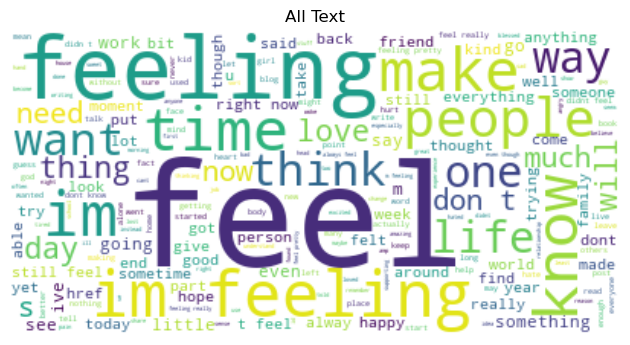

In [14]:
plt.imshow(all_wordcloud, interpolation='bilinear')
plt.title('All Text')
plt.axis('off')

plt.tight_layout()
# plt.savefig("alltext.jpg", dpi=300)
plt.show()


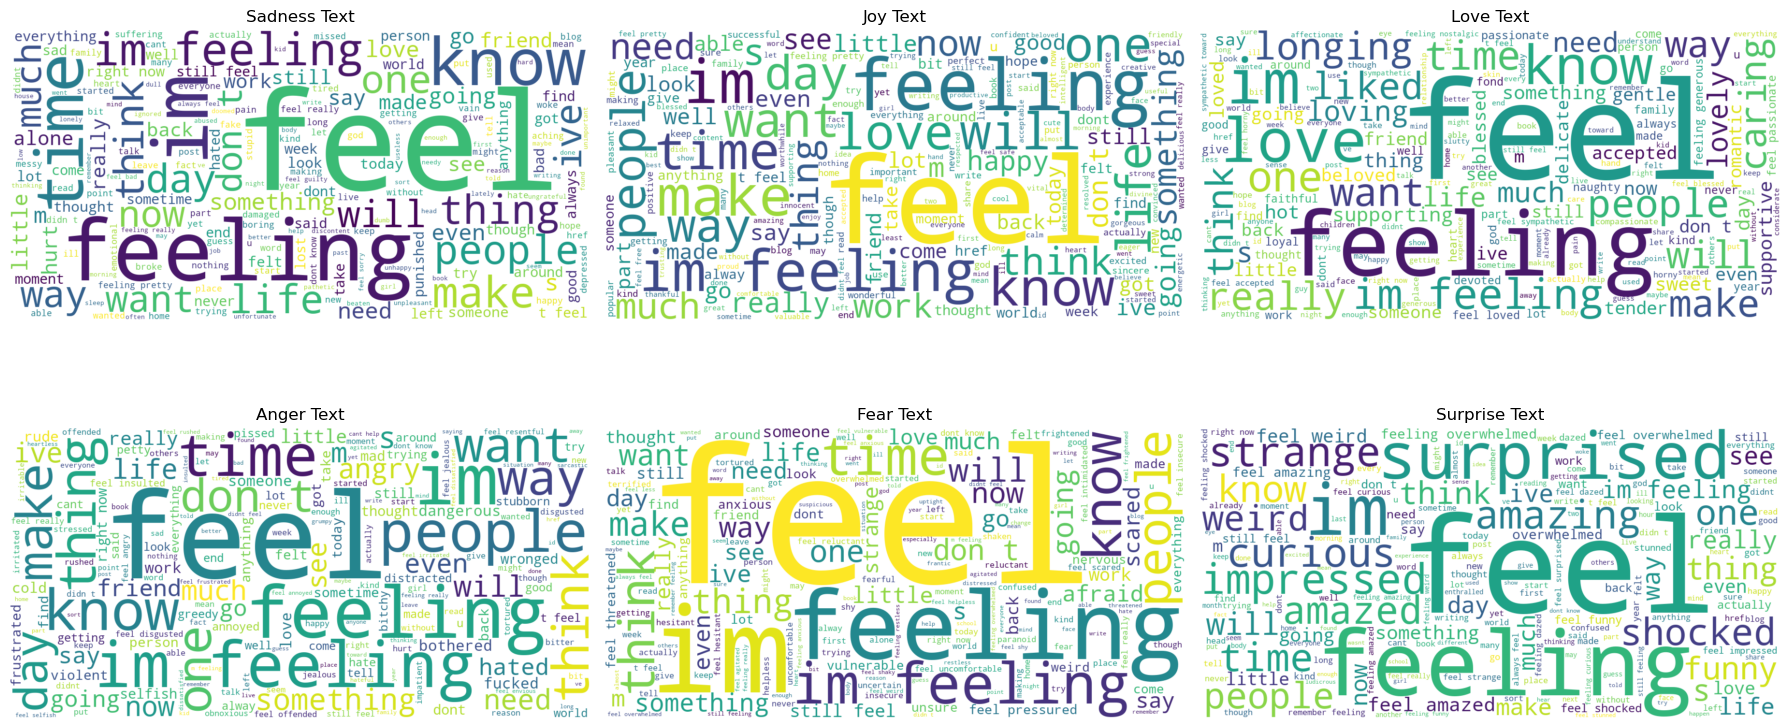

In [15]:
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text')
plt.axis('off')

plt.tight_layout()
plt.show()

# Text Preprocessing

Import needed libraries. Download the necessary stopwords for use in text processing. After running it, I can filter out common stopwords from the text data.

In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnpospisil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Remove URLs.

In [17]:
df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)
print(df.head())

                                                                                                                                                                                                                                         Text  \
0                                                                                                                                                                                               i just feel really helpless and heavy hearted   
1  ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing   
2                                                                                                                                                                             i gave up my internship with the dmrg and am feeling distraught   
3                                   

Remove puctuation.

In [18]:
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)
print(df.head())

                                                                                                                                                                                                                                         Text  \
0                                                                                                                                                                                               i just feel really helpless and heavy hearted   
1  ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing   
2                                                                                                                                                                             i gave up my internship with the dmrg and am feeling distraught   
3                                   

Remove extra whitespaces.

In [19]:
df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True)
print(df.head())

                                                                                                                                                                                                                                         Text  \
0                                                                                                                                                                                               i just feel really helpless and heavy hearted   
1  ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing   
2                                                                                                                                                                             i gave up my internship with the dmrg and am feeling distraught   
3                                   

Remove Numeric Values in Text.

In [20]:
df['Text'] = df['Text'].str.replace(r'\d+', '', regex=True)
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing,0
2,i gave up my internship with the dmrg and am feeling distraught,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies were the only alternative,4


Lowercase all text.

In [21]:
df['Text'] = df['Text'].str.lower()
print(df.head())

                                                                                                                                                                                                                                         Text  \
0                                                                                                                                                                                               i just feel really helpless and heavy hearted   
1  ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing   
2                                                                                                                                                                             i gave up my internship with the dmrg and am feeling distraught   
3                                   

Remove Stopwords.

In [22]:
stop = stopwords.words('english')
df["Text"] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly needed last weeks around end uni expo lately started find feeling bit listless never really good thing,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job taken university entrance exam suffered anxiety weeks want carry work studies alternative,4


Remove all non-alphabetic characters.

In [23]:
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df.head()

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly needed last weeks around end uni expo lately started find feeling bit listless never really good thing,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job taken university entrance exam suffered anxiety weeks want carry work studies alternative,4


# Create the Train/Test Split

In [24]:
X = df['Text']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Tokenization and Padding Sequences

This code takes your text data, builds a vocabulary (limiting it to the most frequent 50,000 words), and then converts the texts into sequences of integers that can be used as input for a machine learning model.

In [25]:
tokenizer = Tokenizer(num_words=50000)
# Updates internal vocabulary based on a list of texts.
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
# Transforms each text in texts to a sequence of integers.
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

Find the Maximum Length in X_train_sequences.

In [26]:
maxlen = max(len(tokens) for tokens in X_train_sequences)
maxlen

79

This code standardizes the length of all the sequences by padding them to the length of the longest training sequence.

In [27]:
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen)

### Define Input Size.

In [28]:
input_Size = np.max(X_train_padded) + 1
input_Size

50000

In [29]:
np.max(X_test_padded)

40553

# The Model

## Base Model

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense

# Define key parameters
input_Size = input_Size      # Size of your vocabulary
embedding_dim = 50      # Dimensionality of the embedding vectors
num_labels = 6          # Number of emotion classes

# Build a simple base model using the Sequential API
base_model = Sequential([
    # Embedding layer to convert tokens into dense vectors
    Embedding(input_dim=input_Size, output_dim=embedding_dim),
    
    # A single Bidirectional GRU layer to process the sequence in both directions.
    Bidirectional(GRU(64)),
    
    # Output Dense layer with softmax activation for classification
    Dense(num_labels, activation='softmax')
])

# Compile the base model
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the base model summary
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          2500000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              44544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 2,545,318
Trainable params: 2,545,318
Non-trainable params: 0
_________________________________________________________________


2025-03-05 10:34:48.308340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-03-05 10:34:48.309406: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-03-05 10:34:48.310112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [31]:
base_model.fit(X_train_padded, y_train, epochs=2, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/2


2025-03-05 10:34:48.551828: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2025-03-05 10:34:48.785158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-03-05 10:34:48.786424: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-03-05 10:34:48.787297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

223/223 [==============================] - ETA: 0s - loss: 0.8200 - accuracy: 0.7005

2025-03-05 10:36:06.552809: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-03-05 10:36:06.553347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-03-05 10:36:06.553964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

223/223 [==============================] - 83s 361ms/step - loss: 0.8200 - accuracy: 0.7005 - val_loss: 0.2330 - val_accuracy: 0.9058
Epoch 2/2
223/223 [==============================] - 64s 286ms/step - loss: 0.1560 - accuracy: 0.9282 - val_loss: 0.1318 - val_accuracy: 0.9289


In [32]:
base_model.evaluate(X_test_padded, y_test)

2606/2606 [==============================] - 9s 3ms/step - loss: 0.1318 - accuracy: 0.9289


[0.13175489008426666, 0.9288644790649414]

## Improved Model 1

In [33]:
# Create a sequential model container
model = Sequential()

# Add an Embedding layer to transform integer-encoded words into dense 50-dimensional vectors.
model.add(Embedding(input_dim=input_Size, output_dim=embedding_dim))

# Add a Dropout layer to randomly deactivate 15% of neurons during training.
# model.add(Dropout(0.15))

# Add the first Bidirectional GRU layer with 120 units.
model.add(Bidirectional(GRU(120, return_sequences=True)))

# Add the second Bidirectional GRU layer with 64 units, also returning sequences.
model.add(Bidirectional(GRU(64)))

# Add a Batch Normalization layer to normalize the output from the previous GRU layers.
# model.add(BatchNormalization())

# Add a third Bidirectional GRU layer with 64 units.
# model.add(Bidirectional(GRU(64)))

# Add a Dense output layer with 6 units (i.e. emotions) and a softmax activation function.
model.add(Dense(6, activation='softmax'))

# Compile the model with the Adam optimizer and a sparse categorical crossentropy loss.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


2025-03-05 10:37:24.004566: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-03-05 10:37:24.005356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-03-05 10:37:24.005717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [34]:
model.fit(X_train_padded, y_train, epochs=2, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/2


2025-03-05 10:37:24.272775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-03-05 10:37:24.273504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-03-05 10:37:24.274043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

223/223 [==============================] - ETA: 0s - loss: 0.6536 - accuracy: 0.7525

2025-03-05 10:40:56.162861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-03-05 10:40:56.163620: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-03-05 10:40:56.164252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

223/223 [==============================] - 230s 1s/step - loss: 0.6536 - accuracy: 0.7525 - val_loss: 0.1737 - val_accuracy: 0.9178
Epoch 2/2
223/223 [==============================] - 199s 891ms/step - loss: 0.1278 - accuracy: 0.9323 - val_loss: 0.1168 - val_accuracy: 0.9304


In [35]:
model.evaluate(X_test_padded, y_test)

2606/2606 [==============================] - 32s 12ms/step - loss: 0.1168 - accuracy: 0.9304


[0.11681912839412689, 0.9303759336471558]

## Improved Model 2

In [36]:
# Create a sequential model container
model = Sequential()

# Add an Embedding layer to transform integer-encoded words into dense 50-dimensional vectors.
model.add(Embedding(input_dim=input_Size, output_dim=embedding_dim))

# Add a Dropout layer to randomly deactivate 15% of neurons during training.
model.add(Dropout(0.15))

# Add the first Bidirectional GRU layer with 120 units.
model.add(Bidirectional(GRU(120, return_sequences=True)))

# Add the second Bidirectional GRU layer with 64 units, also returning sequences.
model.add(Bidirectional(GRU(64, return_sequences=True)))

# Add a Batch Normalization layer to normalize the output from the previous GRU layers.
model.add(BatchNormalization())

# Add a third Bidirectional GRU layer with 64 units.
model.add(Bidirectional(GRU(64)))

# Add a Dense output layer with 6 units (i.e. emotions) and a softmax activation function.
model.add(Dense(6, activation='softmax'))

# Compile the model with the Adam optimizer and a sparse categorical crossentropy loss.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


2025-03-05 10:45:04.805970: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-03-05 10:45:04.806451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-03-05 10:45:04.806943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [37]:
model.fit(X_train_padded, y_train, epochs=2, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/2


2025-03-05 10:45:05.198807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-03-05 10:45:05.199503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-03-05 10:45:05.200008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

223/223 [==============================] - ETA: 0s - loss: 0.4338 - accuracy: 0.8307

2025-03-05 10:49:34.379364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-03-05 10:49:34.379988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-03-05 10:49:34.380623: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

223/223 [==============================] - 293s 1s/step - loss: 0.4338 - accuracy: 0.8307 - val_loss: 0.6633 - val_accuracy: 0.8673
Epoch 2/2
223/223 [==============================] - 292s 1s/step - loss: 0.1040 - accuracy: 0.9382 - val_loss: 0.1295 - val_accuracy: 0.9315


In [38]:
model.evaluate(X_test_padded, y_test)

2606/2606 [==============================] - 46s 18ms/step - loss: 0.1295 - accuracy: 0.9315


[0.12949515879154205, 0.9314795732498169]

## Fine-Tuned Model

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [39]:
# Create a sequential model container
model = Sequential()

# Add an Embedding layer to transform integer-encoded words into dense 50-dimensional vectors.
model.add(Embedding(input_dim=input_Size, output_dim=embedding_dim))

# Add a Dropout layer to randomly deactivate 15% of neurons during training.
model.add(Dropout(0.15))

# Add the first Bidirectional GRU layer with 120 units.
model.add(Bidirectional(GRU(120, return_sequences=True)))

# Add the second Bidirectional GRU layer with 64 units, also returning sequences.
model.add(Bidirectional(GRU(64, return_sequences=True)))

# Extra Bidirectional GRU layer (64 units, return sequences) for deeper sequence processing.
model.add(Bidirectional(GRU(64, return_sequences=True)))

# Add a Batch Normalization layer to normalize the output from the previous GRU layers.
model.add(BatchNormalization())

# Add a third Bidirectional GRU layer with 64 units.
model.add(Bidirectional(GRU(64)))

# Add a Dense output layer with 6 units and a softmax activation function.
model.add(Dense(6, activation='softmax'))

# Compile the model with the Adam optimizer and a sparse categorical crossentropy loss.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


2025-03-05 10:55:35.832481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-03-05 10:55:35.833196: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-03-05 10:55:35.833612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Fit the Model

In [40]:
model.fit(X_train_padded, y_train, epochs=2, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/2


2025-03-05 10:55:36.369816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-03-05 10:55:36.370659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-03-05 10:55:36.371203: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

223/223 [==============================] - ETA: 0s - loss: 0.4214 - accuracy: 0.8336

2025-03-05 11:01:05.825768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-03-05 11:01:05.826420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-03-05 11:01:05.827009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

223/223 [==============================] - 357s 2s/step - loss: 0.4214 - accuracy: 0.8336 - val_loss: 0.6967 - val_accuracy: 0.8542
Epoch 2/2
223/223 [==============================] - 346s 2s/step - loss: 0.1078 - accuracy: 0.9369 - val_loss: 0.1326 - val_accuracy: 0.9331


In [41]:
model.evaluate(X_test_padded, y_test)

2606/2606 [==============================] - 59s 22ms/step - loss: 0.1326 - accuracy: 0.9331


[0.13255345821380615, 0.933122992515564]

### Model parameters

## Another Model

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Bidirectional, GRU, BatchNormalization, GlobalMaxPooling1D, Dense

# Define key parameters
# input_Size: vocabulary size
# embedding_dim: increased to 100 for richer representations
# num_labels: number of emotion classes (6)
input_Size = input_Size
embedding_dim = 100
num_labels = 6

improved_model = Sequential([
    # Embedding layer: converts integer-encoded words into dense vectors.
    # Increased output dimension to 100 for richer word representations.
    Embedding(input_dim=input_Size, output_dim=embedding_dim),
    
    # Dropout layer: deactivates 20% of neurons to help prevent overfitting.
    Dropout(0.2),
    
    # First Bidirectional GRU layer with 128 units, with recurrent dropout.
    # return_sequences=True allows stacking of additional RNN layers.
    Bidirectional(GRU(128, return_sequences=True, recurrent_dropout=0.2)),
    
    # Second Bidirectional GRU layer with 64 units, also returning sequences.
    Bidirectional(GRU(64, return_sequences=True, recurrent_dropout=0.2)),
    
    # Batch Normalization layer: normalizes the output from the previous layer for stability.
    BatchNormalization(),
    
    # Third Bidirectional GRU layer with 64 units, with return_sequences to keep the time dimension.
    Bidirectional(GRU(64, return_sequences=True, recurrent_dropout=0.2)),
    
    # GlobalMaxPooling1D layer: extracts the most salient features across the time dimension.
    GlobalMaxPooling1D(),
    
    # Dense layer with ReLU activation to learn complex patterns.
    Dense(64, activation='relu'),
    
    # Additional dropout for regularization.
    Dropout(0.3),
    
    # Batch Normalization to further stabilize learning.
    BatchNormalization(),
    
    # Output layer with softmax activation to yield a probability distribution over the classes.
    Dense(num_labels, activation='softmax')
])

# Compile the improved model with Adam optimizer and appropriate loss/metrics.
improved_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the improved model summary
improved_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         5000000   
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 bidirectional_10 (Bidirecti  (None, None, 256)        176640    
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, None, 128)        123648    
 onal)                                                           
                                                                 
 batch_normalization_2 (Batc  (None, None, 128)        512       
 hNormalization)                                                 
                                                      

In [43]:
improved_model.fit(X_train_padded, y_train, epochs=2, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/2
223/223 [==============================] - 477s 2s/step - loss: 0.5308 - accuracy: 0.8136 - val_loss: 1.0643 - val_accuracy: 0.7640
Epoch 2/2
223/223 [==============================] - 481s 2s/step - loss: 0.1330 - accuracy: 0.9352 - val_loss: 0.1862 - val_accuracy: 0.9322


In [44]:
model.evaluate(X_test_padded, y_test)

2606/2606 [==============================] - 63s 24ms/step - loss: 0.1326 - accuracy: 0.9331


[0.13255345821380615, 0.933122992515564]

# <span style="color:#5E6997">Predict Tweet Classification</span> <a class="anchor" id="predict"></a>

### Visualize Results

In [45]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()


# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

NameError: name 'history' is not defined

Three epochs looks like it would be the best training time.

# Evaluate the Model

In [ ]:
model.evaluate(X_test_padded, y_test)

93.1% is pretty good.

### Make predictions

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

### The Confusion Matrix

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

Remember that sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

In [ ]:
sns.countplot(x ='Label', data = label_df)

# <span style="color:#5E6997">Conclusion</span> <a class="anchor" id="conclusion"></a>